In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [ ]:
df =pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

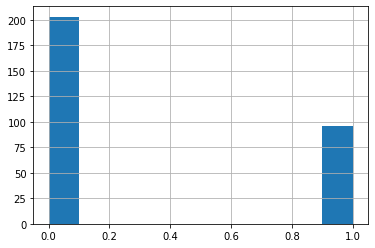

In [ ]:
# take target variable and plot histogram
df['DEATH_EVENT'].hist()

here we can observe that we have an unbalanced data which needs to be rectified. It will affect accuracy and result in a case of overfitting a model training the model to be trained on the majority and less on the minority.
we will be using upsampling to remedy this:

In [ ]:
from sklearn.utils import resample

safe = df[df["DEATH_EVENT"]== 0]
unsafe = df[df["DEATH_EVENT"]== 1]

In [ ]:
upsampled = resample(unsafe,
replace=True, 
n_samples = len(safe),
random_state = 33)

In [ ]:
upsampled = pd.concat([safe, upsampled])

#checking new class counts
upsampled['DEATH_EVENT'].value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

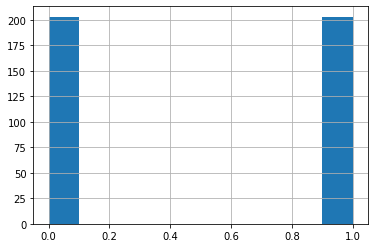

In [ ]:
upsampled['DEATH_EVENT'].hist()

In [ ]:
x = upsampled.drop(['DEATH_EVENT'], axis = 1) #independent features
y = upsampled["DEATH_EVENT"]

In [ ]:
# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 33)

In [ ]:
print(f'x Training Shape:', x_train.shape)
print(f'y Training Shape:', y_train.shape)
print(f'x Testing Shape:', x_test.shape)
print(f'y Testing Shape:', y_test.shape)

x Training Shape: (324, 12)
y Training Shape: (324,)
x Testing Shape: (82, 12)
y Testing Shape: (82,)


In [ ]:
!pip install auto-sklearn

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
clf = AutoSklearnClassifier(time_left_for_this_task=300, #time in seconds to find the appropriate model, if you increase the time theres a better chance of finding the right model
                            per_run_time_limit = 40, #model fitting will be terminated if machine learning algorithm runs over this time limit
                            ensemble_size = 1,
                            initial_configurations_via_metalearning=0)
# Init training
clf.fit(x_train, y_train)


AutoSklearnClassifier(ensemble_size=1,
                      initial_configurations_via_metalearning=0,
                      per_run_time_limit=40, time_left_for_this_task=300)

In [ ]:
clf.score(x_train,y_train)

0.9845679012345679

In [ ]:
clf.score(x_test, y_test)

0.8658536585365854

We can see that our model is trained very well on the training data, and our model performs well in testing too. 



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(x_test)

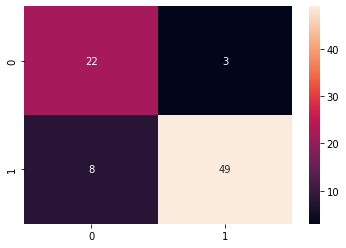

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

We can see that we have 49 true positives and 22 true negatives, which are the values correctly preedicted by our model. But we have 11 values are predicted wrong, with 3 false positives and 8 are the false negatives.

In [ ]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8658536585365854


In [ ]:
clf.show_models()

"[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:gradient_boosting:early_stop': 'train', 'classifier:gradient_boosting:l2_regularization': 0.4517173771991449, 'classifier:gradient_boosting:learning_rate': 0.06517698371900044, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 6, 'classifier:gradient_boosting:min_samples_leaf': 10, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_